# Homework 3

In [1]:
import pandas as pd
import numpy as np
import sympy as sym
from sympy import Symbol, cos, sin, lambdify
import matplotlib.pyplot as plt
import pdb
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [2]:
x1  = sym.Symbol('x1')
x2 = sym.Symbol('x2')
function = (5*x1-x2)**4+((x1-2)**2)+(x1-2*x2)+12
f = lambdify([[x1,x2]], function, 'numpy')
# plot the function
f_2 = lambdify([[x1,x2]], function, 'numpy')

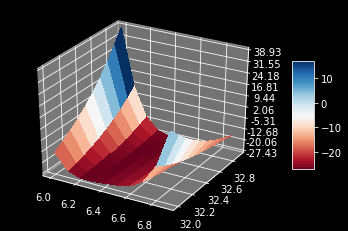

In [4]:
x = np.arange(6.0,7.0,0.1)
y = np.arange(32.0,33.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = f_2(X,Y) # evaluation of the function on the grid

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Cyclic Coordinate Search

In [3]:
def BisectionMethod(f, a=-100,b=100,epsilon=0.005) :
    iteration=0
    while (b - a) >= epsilon:
        x_1 = (a + b) / 2
        fx_1 = f(x_1)
        if f(x_1 + epsilon) <= fx_1:
            a = x_1
        else:
            b = x_1
        iteration+=1
    x_star = (a+b)/2
    return x_star

In [4]:
def ExactLineSearch(f, x0, d):
    alpha = sym.Symbol('alpha')
    function_alpha = f(np.array(x0)+alpha*np.array(d))
    f_alp = lambdify(alpha, function_alpha, 'numpy')
    alp_star = BisectionMethod(f_alp)
    return alp_star

ExactLineSearch(f,[-5,1],[0,1])


-25.20904541015625

In [5]:
def CyclicCoordinateSearch(f, x0, epsilon):
    """
    Cyclic Coordinate Search method.
    Parameters
    ----------
    f : lambda expression The function to be evaluated
    x0 : numpy.array Starting coordinates
    epsilon : float Epsilon value determined to check optimality
    Returns
    ---------
    x1 : numpy.array The found x* vector
    k : integer Number of iterations
    """
    x0 = np.array(x0)
    k = 0
    n = len(x0)
    while(True):
        y0 = x0
        for j in range(n):
            d = np.zeros(n)
            d[j] = 1
            # exact line search:
            # minimize y1 = f(y0+alpha*d)
            alpha = ExactLineSearch(f, y0, d)
            y1 = y0 + alpha*d
            y0 = y1
        x1 = y0
        k += 1
        print(k)
        if(np.linalg.norm(x1-x0) < epsilon):
            return x1, k
        else:
            x0 = x1

In [10]:
CyclicCoordinateSearch(f,[-8,10],0.01)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220


(array([ 5.93737793, 30.47729492]), 220)

## Hook & Jeeves Method

In [ ]:
# code goes to here

## Simplex Search

In [6]:
def SimplexSearch():
    x=np.zeros(shape=(3,2))
    x_1=np.array([-2,15])#initial
    x_2=np.array([-8,10])#initial
    x_3=np.array([0,0])#initial
    x[0]=x_1
    x[1]=x_2
    x[2]=x_3 
    def compute_f_values(a):
        f_values=np.zeros(a.shape[0])    
        for i in range(a.shape[0]):
            f_values[i]=f(a[i])
        return f_values    
    epsilon=1
    alpha=1
    beta=0.5
    gamma=2
    
    while(True):    
        sum_value=0
        f_values=compute_f_values(x)#function values of x_matrix
        x_h=x[np.argmax(f_values)] #the worst point
        x_l=x[np.argmin(f_values)] #the best point
        index_to_go=np.argmax(f_values) #index of x_h
        mean_x=np.delete(x, index_to_go, 0)#x matrix rather than x_h
        x_mean=np.mean(mean_x,axis=0)#compute the mean of x matrix rather than x_h
        f_values_mean_x=compute_f_values(mean_x)#function values of x_matrix except x_h
        
        x_r=x_mean+alpha*(x_mean-x_h) #reflection
        
        if f(x_l)>f(x_r): #the reflected point x_r happens to be better than the current best  
            x_e=x_mean+gamma*(x_r-x_mean) #Expansion
            if f(x_r)>f(x_e): #the expanded point x_e happens to be better than the current best x_r
                x[np.argmax(f_values)]=x_e
            else:             #the expanded point is not better than x_r so we replace x_h with x_r
                x[np.argmax(f_values)]=x_r
        
        else:
            if (np.max(f_values_mean_x))>=f(x_r):
                x[np.argmax(f_values)]=x_r
            else:
                if f(x_h)>f(x_r):
                    x_h_prime=x_r
                else:
                    x_h_prime=x_h
                
                x_c=x_mean+beta*(x_h_prime-x_mean) #contraction
                if f(x_c) <= f(x_h):
                    x[np.argmax(f_values)]=x_c
                else:
                    for i in range(3):
                        x[i]=x[i]+0.5*(x_l-x[i]) #shrink operation
        
        for i in range(3):
            sum_value+=(f(x[i])-f(x_mean))**2
        print(sum_value)
        if np.sqrt(sum_value)<epsilon:
            break
                
    return x_mean

In [7]:
SimplexSearch()

135223363328.92628
203885721.6862696
2056329.600068192
44870.493746689186
239.97909184589793
35.96862115192294
217.87063233012182
136.33545217192335
243.53578896372704
148.92848458008888
90.51635346523167
9.492239133478774
2.306038122365278
0.45886643259234905


array([ 6.31959915, 32.06944466])